# Importando bibliotecas

In [43]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Aquisição dos dados

link:https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv

In [9]:
url = 'https://gist.githubusercontent.com/davidneves11/01b2963f7a8dfd87d79010fbf847b221/raw/685870f4365bcda4e5bb9e342285e0aac37dd556/colesterol.csv'

In [10]:
colesterol = pd.read_csv(url)

colesterol.head(10)

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
5,56,1,2,120,0,0,178,0,0.8,1,0,3,0,236
6,62,0,4,140,0,2,160,0,3.6,3,2,3,3,268
7,57,0,4,120,0,0,163,1,0.6,1,0,3,0,354
8,63,1,4,130,0,2,147,0,1.4,2,1,7,2,254
9,53,1,4,140,1,2,155,1,3.1,3,0,7,1,203


## Descrição das colunas

In [11]:
colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

- `idade` : Idade (anos)
- `genero` : 1 = Homem, 0 = Mulher
- `tipo_dor_peito` : 1 = Angina típica, 2 = Angina atípica, 3 = Não anginiosa, 4 = Assintomática
- `pressao_sanguinea_repouso` : Pressão sanguínea (mm Hg)
- `acucar_jejum` : (Açucar no sangue em jejum > 120 mg/dl) 1 = Verdadeiro, 0 = Falso
- `resultado_eletrocardio` : 0 = Normal, 1 = Anomalia na onda ST-T, 2 = Provável ou definitiva hipertrofia ventricular esquerda
- `freq_cardio_max` : Frequência cardíaca máxima atingida
- `angina_exercicio` : Angina induzida por exercício 1 = Sim, 0 = Não
- `depressao_induzida_exercicio` : Depressão de ST induzida pelo exercício em relação ao repouso
- `inclinacao` : A inclinação do segmento ST de exercício de pico 1 = Ascendente, 2 = Plano, 3 = Descendente
- `num_princ_vasos` : Número de vasos principais (0 - 3)
- `thal` : 3 = Normal, 6 = Defeito corrigido, 7 = Defeito reversível
- `diag_doenca_cardiaca` : Número de diagnósticos de doença cardíaca
- `colesterol` : Colesterol (mg/dl)

# Tratando dados

In [16]:
colesterol['num_princ_vasos'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: num_princ_vasos, dtype: int64

In [17]:
colesterol['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [37]:
colesterol = colesterol.query("num_princ_vasos != '?' & thal != '?'")

# Criando modelo para clustering

In [38]:
SEED = 73

In [39]:
kmeans = KMeans(n_clusters=2, random_state=SEED)

Como é um aprendizado **Não-supervisionado**, não criamos um conjunto y.

In [40]:
x = colesterol.select_dtypes('int64')

In [41]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=73)

Como selecionamos 2 para o número de clusters, ele vai escolher para cada linha 1 ou 0

In [42]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# Visualização

Para exemplificar como foi feita a separação, segue um gráfico de pressão sanguínea e colesterol

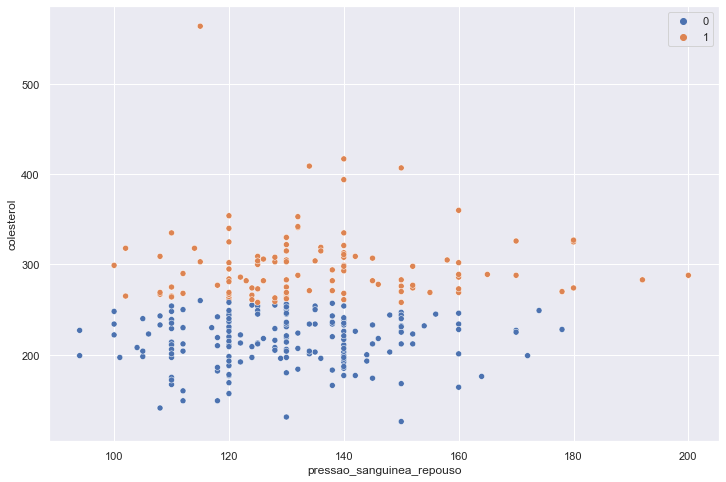

In [47]:
sns.set_theme()
plt.figure(figsize=(12, 8))

sns.scatterplot(data=colesterol, x='pressao_sanguinea_repouso', y='colesterol', hue=kmeans.labels_)

plt.show()